## import common libraries

In [3]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist



{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
some_digit=X[36000]

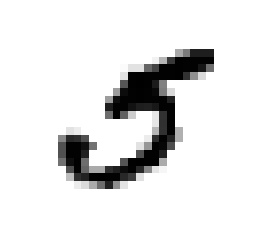

In [7]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [8]:
other_digit=X[36111]

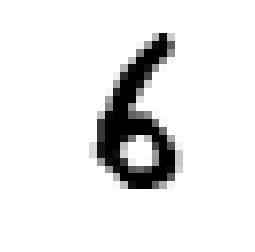

In [9]:
other_digit_image = other_digit.reshape(28, 28)
plt.imshow(other_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")


plt.show()

In [10]:
y[36000]

5.0

In [11]:
y[36111]

6.0

In [12]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

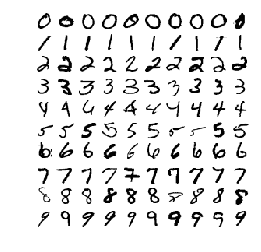

In [13]:
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
#suffle the training set,this will guarantee that all cross-validation fold will be similar(you dont want one fold to be missing some digits)
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary classifier

In [16]:
#try with only two digit 5 and 6

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [18]:
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).


In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [20]:
from sklearn.linear_model import SGDClassifier

sgd_clf6 = SGDClassifier(random_state=42)
sgd_clf6.fit(X_train, y_train_6)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [21]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [22]:
sgd_clf6.predict([other_digit])

array([ True], dtype=bool)

## Performance Measures

###### Measuring Accuracy using cross-validation

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([ 0.9502 ,  0.96565,  0.96495])

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf6,X_train,y_train_6,cv=3,scoring="accuracy")

array([ 0.98230088,  0.98155   ,  0.98134907])

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


## confusion Matrix

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [28]:
y_train_pred6= cross_val_predict(sgd_clf, X_train, y_train_6, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_6, y_train_pred6)

array([[53459,   623],
       [  473,  5445]])

In [30]:


y_train_perfect_predictions = y_train_5

y_train_perfect_predictions6 = y_train_6


In [31]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [32]:
confusion_matrix(y_train_6, y_train_perfect_predictions6)

array([[54082,     0],
       [    0,  5918]])

###### Precision and score

In [33]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.76871350203503808

In [34]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_6, y_train_pred)

0.041939479738099451

In [35]:


recall_score(y_train_5, y_train_pred)



0.80132816823464303

In [36]:


recall_score(y_train_6, y_train_pred6)



0.9200743494423792

In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.78468208092485547

In [38]:
from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred6)

0.90855998665109305

In [39]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 161855.74572176])

In [40]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [41]:
y_scores6 = sgd_clf6.decision_function([other_digit])
y_scores6

array([ 356717.48853382])

In [42]:
y_some_digit_pred

array([ True], dtype=bool)

In [43]:
threshold = 0
y_some_digit_pred6 = (y_scores6 > threshold)
y_some_digit_pred6

array([ True], dtype=bool)

In [44]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

which threshold to use?get the score of all instances in the training set using cross_val_predict() function but you want it to return decision score instead of prediction.

In [47]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([ -434076.49813641, -1825667.15281624,  -767086.76186905, ...,
        -867191.25267993,  -565357.11420164,  -366599.16018198])

compute precision and recall for all possible thresholds using precision recall curve function

In [48]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


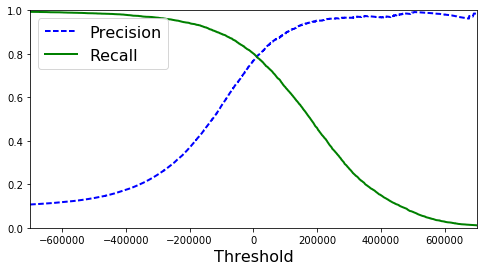

In [49]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])

plt.show()


In [50]:
(y_train_pred == (y_scores > 0)).all()

True

In [51]:
y_train_pred_90 = (y_scores > 70000)


In [52]:
precision_score(y_train_5, y_train_pred_90)

0.86592051164915484

In [53]:
recall_score(y_train_5, y_train_pred_90)


0.69931746910164172

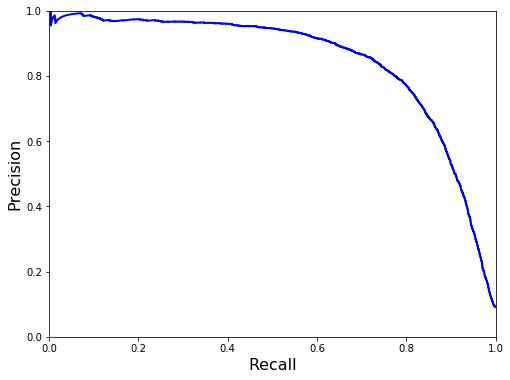

In [54]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()


## ROC curves

#same as precision/recall curve but instead of calling that it plots the true positive rate(TPR) against false positive rate(FPR)

In [56]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

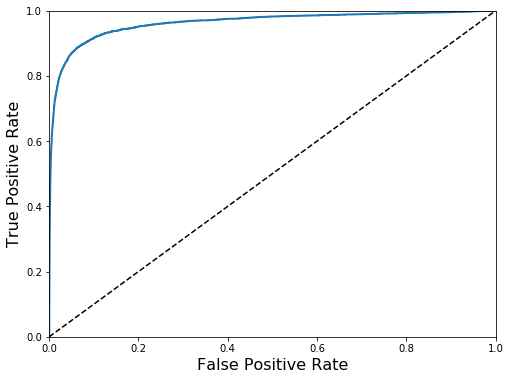

In [57]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)


0.96244965559671547

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")


In [60]:
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


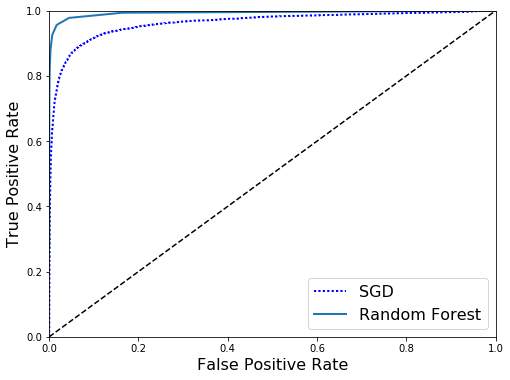

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [62]:
roc_auc_score(y_train_5, y_scores_forest)

0.99312433660038291

#you can see this random forest classifier is much better than sgdclassifier,it comes much closer to top-left corner.roc auc curve is also significantly better

In [63]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.98529734474434938

In [64]:
recall_score(y_train_5, y_train_pred_forest)


0.82826046854823832

## Multiclass classification

In [65]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array([ 5.])

In [66]:
#instead of returning one score decision function returns all the 10 scores
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [69]:
#higher score is indeed the one corresponding to class 5
np.argmax(some_digit_scores)

5

In [70]:
sgd_clf.classes_


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])